# Logistic Regression

A local model in the single index. 

The model is $E[y_i | x_i] = 1/(1+\exp(-(x_i + \mu)))$, where $\mu$ is the unknonw parameter to be estimated.

In [169]:
# translate the following R code into python

import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm

n  = 100000
beta_true = 0.2

X = np.random.rand(n) - 0.5 # uniform on [-0.5, 0.5]
e = np.random.logistic(0, 1, n)

y_star = X + beta_true - e
y = y_star > 0

In [170]:
# the sample objective function (negative log-likelihood)

def neg_log_lik(param, y, X):
    # calculate the linear predictor
    z = X + param
    p = 1 / (1 + np.exp(-z))
    
    # calculate the negative log-likelihood
    nll  = -np.mean( y * np.log(p) + (1 - y) * np.log(1 - p) )
    
    return(nll)


In [171]:
# the population objective function (negative expected log-likelihood)

def neg_E_log_lik(param, beta_true, X):
    # calculate the linear predictor
    z = X + param
    
    # calculate the predicted probabilities
    p = 1 / (1 + np.exp(-z))
    p_true = 1 / (1 + np.exp(-X - beta_true))
    
    nll = -np.mean( p_true * np.log(p) + (1 - p_true) * np.log(1 - p) )
    
    return(nll)


In [172]:
b_base = np.linspace(beta_true - 0.5, beta_true + 0.5, 101)
log_v = np.zeros((len(b_base), 2))

for i in range(len(b_base)):
    log_v[i,0] = neg_log_lik(b_base[i], y, X)
    log_v[i,1] = neg_E_log_lik(b_base[i], beta_true, X)



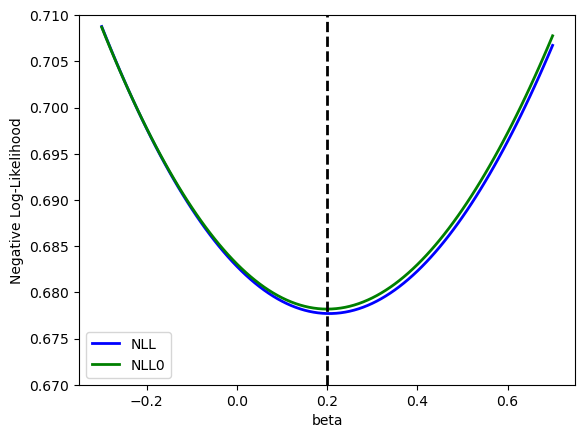

In [173]:
# plot

plt.plot(b_base, log_v[:,0], color = "blue", linewidth = 2)
plt.plot(b_base, log_v[:,1], color = "green", linewidth = 2)
plt.ylim(0.67, 0.71)
plt.axvline(x = beta_true, color = "black", linewidth = 2, linestyle = "--")
plt.xlabel("beta")
plt.ylabel("Negative Log-Likelihood")
plt.legend(["NLL", "NLL0"])
plt.show()



**Experience**:

This python code is translated by copilot from R code. The translation is very useful, with high acccuracy.